In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV


from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))


pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 150)

features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']


In [2]:
data = pd.read_csv('housing.data', delim_whitespace=True , lineterminator='\n',names = features, header=None)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [3]:
# rescaling the variables (both)
data_columns = data.columns
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# rename columns (since now its an np array)
data = pd.DataFrame(data)
data.columns = data_columns
data.head()




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


## Identify Co-orelated features using diagonal co relation matrix

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

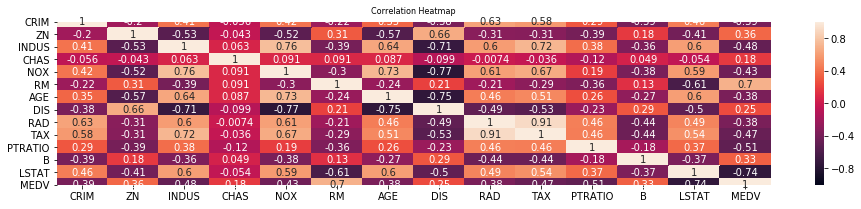

In [5]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 3))


heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':8}, pad=8);

We can see above , almost all the features are co-orelated. Every feature has highest co-relation with MEDV

# Pick one feature that you think can be predicted by the other features in the dataset. 
# The feature to be predicted needs to have numerical values.

In [6]:
X = data.drop('MEDV',axis = 'columns')
y =  data.MEDV

X.shape

(506, 13)

In [7]:
from sklearn.model_selection import train_test_split, cross_val_score


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


In [8]:
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

### Linear Regression (Ordinary Least Squares)
### Linear Regression fits a model to minimize the residual sum of squares between observed and predicted targets.


In [9]:
from sklearn.linear_model import LinearRegression

# Train model
lr = LinearRegression().fit(X_train, y_train)

# get cross val scores
get_cv_scores(lr)

CV Mean:  0.706207905330934
STD:  0.07608007482565272




In [10]:
print('Train Score: ', lr.score(X_train, y_train))
print('Test Score: ', lr.score(X_test, y_test))

Train Score:  0.7447277571093978
Test Score:  0.7224270507537733


In [11]:
# coef_ attribute is numpy array with one entry per input feature
lr.coef_

array([-0.20812938,  0.08755183, -0.00559687,  0.07183917, -0.16636553,
        0.4874421 ,  0.00306673, -0.34094121,  0.14816502, -0.12898036,
       -0.20001196,  0.09518871, -0.39398736])

In [12]:
# match column names to coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lr.coef_[coef]}')

CRIM:  -0.20812938073428117
ZN:  0.08755183094947032
INDUS:  -0.005596869135451994
CHAS:  0.07183916867015593
NOX:  -0.1663655253687686
RM:  0.48744209704811825
AGE:  0.0030667345266360106
DIS:  -0.34094121453090337
RAD:  0.1481650153450748
TAX:  -0.12898035681647985
PTRATIO:  -0.20001196292519433
B:  0.09518870579953971
LSTAT:  -0.39398736423082265


In [13]:
# intercept_ always a single floating point number
lr.intercept_

0.42796573514134384

In [14]:

from sklearn.metrics import mean_squared_error

# mean squared error
y_ = lr.predict(X_test)
lr_mse = mean_squared_error(y_, y_test)
lr_mse

0.01176907231158581

In [15]:
import math

# find distance from ground truth target value
math.sqrt(lr_mse)

0.10848535528625884

In [16]:
print(y.min())
print(y.max())

0.0
1.0


### Ridge Regression (L2 Regularization)
### Ridge regression imposes a penalty on the size of the coefficents. Here we want the magnitude of the coefficients to be minimized so that each feature has as little effect on the outcome as possible.

In [17]:
from sklearn.linear_model import Ridge

# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)

# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.706501456552872
STD:  0.06800981997341274




In [18]:
print('Train Score: ', ridge.score(X_train, y_train))
print('Test Score: ', ridge.score(X_test, y_test))

Train Score:  0.7405055381936514
Test Score:  0.7167834172256041


In [19]:


# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7070544078965443
Best Params:  {'alpha': 0.1}


In [20]:
ridge = Ridge(alpha=0.1).fit(X_train, y_train)

get_cv_scores(ridge)

print('Train Score: ', ridge.score(X_train, y_train))
print('Test Score: ', ridge.score(X_test, y_test))

CV Mean:  0.7070544078965442
STD:  0.07472334216617722


Train Score:  0.744662880654931
Test Score:  0.7221003515841085


In [21]:
ridge.intercept_

0.42759399694462563

In [22]:
ridge.coef_

array([-0.19710996,  0.08456906, -0.00855054,  0.0726331 , -0.16044286,
        0.48203047,  0.00323857, -0.3318311 ,  0.1432427 , -0.12528655,
       -0.1996821 ,  0.09499974, -0.39395162])

In [23]:
# match column names to coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {ridge.coef_[coef]}')

CRIM:  -0.19710996179838905
ZN:  0.08456906045002142
INDUS:  -0.00855053809513152
CHAS:  0.072633098721757
NOX:  -0.16044286257063983
RM:  0.48203046617677986
AGE:  0.003238566258536369
DIS:  -0.3318311044752638
RAD:  0.14324269798982212
TAX:  -0.12528655012947906
PTRATIO:  -0.19968209933078068
B:  0.09499974404211373
LSTAT:  -0.39395162177876125


### Lasso Regression (L1 Regularization)

### Lasso regression uses L1 regularization to force some coefficents to be exactly zero which means they are ignored by the model. This can be used as a type of feature selection! Lasso can make the model easier to interpret and reveal the most important features.



In [24]:
from sklearn.linear_model import Lasso

# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)

# get cross val scores
get_cv_scores(lasso)

CV Mean:  -0.01396485451502114
STD:  0.01696095327542136




In [25]:
print('Train Score: ', lasso.score(X_train, y_train))
print('Test Score: ', lasso.score(X_test, y_test))

Train Score:  0.0
Test Score:  -0.0013235048891204748


In [26]:
# find optimal alpha with grid search
alpha = [0, 0.00001, 0.0001 , 0.001, 0.01, 0.1, 1]
param_grid = dict(alpha=alpha)

grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs= -1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Score:  0.7062494912700265
Best Params:  {'alpha': 0.0001}


In [27]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

get_cv_scores(lasso)

print('Train Score: ', lasso.score(X_train, y_train))
print('Test Score: ', lasso.score(X_test, y_test))

CV Mean:  -0.01396485451502114
STD:  0.01696095327542136


Train Score:  0.0
Test Score:  -0.0013235048891204748


In [28]:
lasso.intercept_

0.3914980944004691

In [29]:
lasso.coef_

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [30]:
# match column names to coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {lasso.coef_[coef]}')

CRIM:  -0.0
ZN:  0.0
INDUS:  -0.0
CHAS:  0.0
NOX:  -0.0
RM:  0.0
AGE:  -0.0
DIS:  0.0
RAD:  -0.0
TAX:  -0.0
PTRATIO:  -0.0
B:  0.0
LSTAT:  -0.0


### Elastic-Net
### Elastic-net uses both L1 and L2 regularization.

In [31]:
from sklearn.linear_model import ElasticNet

# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)

# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  -0.01396485451502114
STD:  0.01696095327542136




In [32]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)

grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.7079869460748413
Best Params:  {'alpha': 0.001, 'l1_ratio': 0}


/Users/samipsinghal/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.126e+00, tolerance: 1.570e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [33]:
elastic_net = ElasticNet(alpha=0.001, l1_ratio=0.8).fit(X_train, y_train)

get_cv_scores(elastic_net)

print('Train Score: ', elastic_net.score(X_train, y_train))
print('Test Score: ', elastic_net.score(X_test, y_test))

CV Mean:  0.6944218711190822
STD:  0.0701941790028075


Train Score:  0.7317713219813042
Test Score:  0.7025283310053281


In [34]:
elastic_net.intercept_

0.3790751582628226

In [35]:
elastic_net.coef_

array([-0.01914844,  0.02855212, -0.01486519,  0.07069954, -0.08014472,
        0.48981374, -0.        , -0.1999562 ,  0.04462794, -0.05320703,
       -0.18376329,  0.08222489, -0.40727238])

In [36]:
# match column names to coefficients
for coef, col in enumerate(X_train.columns):
    print(f'{col}:  {elastic_net.coef_[coef]}')

CRIM:  -0.019148442002646832
ZN:  0.02855211527311985
INDUS:  -0.0148651926143048
CHAS:  0.07069954396640707
NOX:  -0.08014471926797391
RM:  0.48981374424833707
AGE:  -0.0
DIS:  -0.1999562005047139
RAD:  0.044627939833594456
TAX:  -0.05320703263040749
PTRATIO:  -0.1837632868615145
B:  0.08222488577900341
LSTAT:  -0.4072723827878002


## Conclusion
## We explored four different linear models for regression:

#### Linear Regression
#### Ridge
#### Lasso
#### Elastic-Net


## We simplified our model with regularization. The R² score reached 0.70 with Ridge regression , was lower with Lasso .


## A mean R² score of 0.72 with ridge regression means we are only able to explain 72 % of the variance with  Ridge Regression model . The standard deviation decreased when compared to linear regression which suggests it is less likely to be overfitting. Default value of alpha was used with Ridge Regression here which might not give best possible result. However , Lasso and Elastic net were tried with multiple alphas using gridsearch cv

## The coefficient for all the features of Lasso were zero. It is completely ignored by the model!  Value of alpha as low as 0.0001 were passed however still all the features were ignored.  Very low values of alpha will cause the model to resemble linear regression. Lasso can be a good model choice when we have a large number of features but expect only a few to be important. This can make the model easier to interpret and reveal the most important features!

## The co-erfficient of age for Elastic Net was zero which completely ignored by the model.